In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read and Understand Data

In [3]:
# Read The Dataset
data = pd.read_excel("Case study excel file.xls")
data.head()

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,...,CIFAS_detected,Time_since_most_recent_outstandi,Insurance_Description,PPI,code,prdt_desc,category,PPI_SINGLE,PPI_JOINT,PPI_LCI
0,1,918,A,36,3000.0,14.4,UnSecured,46,8,132,...,N,16,NaN,0,NaN,NaN,NaN,0,0,0
1,3,903,A,120,21000.0,7.9,secured,16,3,288,...,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
2,4,1060,X,78,7200.0,7.9,secured,17,3,276,...,N,50,Joint,1,719.0,LASCI JOINT,Joint,0,1,0
3,6,839,B,60,8000.0,16.9,UnSecured,47,8,48,...,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
4,7,1057,X,60,7650.0,7.4,UnSecured,55,10,156,...,N,99,Single,1,718.0,LASCI,Single,1,0,0


In [4]:
data.shape

(16383, 59)

The dataset contains 16383 rows and 59 columns.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 59 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ref                               16383 non-null  int64  
 1   Credit_Score                      16383 non-null  int64  
 2   Final_Grade                       16383 non-null  object 
 3   Term                              16383 non-null  int64  
 4   Net_Advance                       16383 non-null  float64
 5   APR                               16383 non-null  float64
 6   Loan_Type                         16383 non-null  object 
 7   Mosaic                            16383 non-null  int64  
 8   Mosaic_Class                      16383 non-null  int64  
 9   Time_at_Address                   16383 non-null  int64  
 10  Residential_Status                16383 non-null  object 
 11  Telephone_Indicator               16383 non-null  object 
 12  Numb

In [6]:
data.isnull().sum()

Ref                                    0
Credit_Score                           0
Final_Grade                            0
Term                                   0
Net_Advance                            0
APR                                    0
Loan_Type                              0
Mosaic                                 0
Mosaic_Class                           0
Time_at_Address                        0
Residential_Status                     0
Telephone_Indicator                    0
Number_of_Dependants                   0
Marital_Status                         0
Gender                                 0
Time_in_Employment                     0
Employment_Status                      0
Full_Part_Time_Empl_Ind                0
Perm_Temp_Empl_Ind                     0
Income_Range                           0
Current_Account                        0
ACCESS_Card                            0
VISA_Card                              0
American_Express                       0
Diners_Card     

Few columns contain null values. Let's handle the null values in the following steps.

In [7]:
data.nunique()

Ref                                 16383
Credit_Score                          613
Final_Grade                            10
Term                                  103
Net_Advance                          1172
APR                                   311
Loan_Type                               2
Mosaic                                 63
Mosaic_Class                           12
Time_at_Address                       526
Residential_Status                      4
Telephone_Indicator                     2
Number_of_Dependants                    9
Marital_Status                          4
Gender                                  2
Time_in_Employment                    469
Employment_Status                       9
Full_Part_Time_Empl_Ind                 2
Perm_Temp_Empl_Ind                      2
Income_Range                            7
Current_Account                         2
ACCESS_Card                             2
VISA_Card                               2
American_Express                  

The dataset does not contain any duplicate rows.

# 2. Data Cleaning and Preparation

## 2.1 Removing Unwanted Columns

In [8]:
col_to_drop = ['Net_Advance','Mosaic','Bureau_Data___Monthly_Other_Co_R','Worst_History_CT',
               'Total_value__CAIS_8_9s','__of_status_3_s_L6m','Years_on_ER_for_SP','Total_outstanding_balance___excl',
               'code','PPI_SINGLE','PPI_JOINT','PPI_LCI']
data = data.drop(col_to_drop,axis=1)
data.shape

(16383, 47)

## 2.2 Handle Missing Values

In [9]:
data[data['PPI'] == 0]['Insurance_Description'].isnull().sum()

6922

Insurance Description is missing for those rows where the customers have not bought any PPI. So let's put the missing values in Insurance_Description columns as No PPI.

In [10]:
data['Insurance_Description'] = data['Insurance_Description'].fillna('No PPI')

In [11]:
data['Insurance_Description'].value_counts()

No PPI                        6922
LASU                          2351
Single                        1849
LIFE & CRITICAL ILLN          1025
Joint                          989
Life & CI                      795
LASCI                          717
Other                          495
JOINT LIFE & CRITICA           283
Life & Critical Illn           248
1st Cust - LASU / 2n           200
JOINT LASU                     159
Joint Life & Critica            68
Gold                            63
1st Cust - LASCI / 2            57
1st Cust-LASU/ 2nd C            42
JOINT LASCI                     39
Plus                            23
1st Cust-LASCI /2nd             12
1st Cust LASCI / 2nd            10
Bronze                           8
Select                           8
1st Cust LASU / 2nd              8
Silver                           7
Foundation                       5
Name: Insurance_Description, dtype: int64

In [12]:
# Removing blank spaces from column values
data['Insurance_Description'] = data['Insurance_Description'].apply(lambda x:x.strip())

In [13]:
# Removing Spelling Anomalies and clubbing the categories together
data['Insurance_Description'].replace(['LIFE & CRITICAL ILLN','Life & CI'],'Life & Critical Illn',inplace=True)
data['Insurance_Description'].replace(['JOINT LIFE & CRITICA'],'Joint Life & Critica',inplace=True)
data['Insurance_Description'].replace(['1st Cust - LASCI / 2','1st Cust-LASCI /2nd'],'1st Cust LASCI / 2nd',inplace=True)
data['Insurance_Description'].replace(['1st Cust - LASU / 2n','1st Cust-LASU/ 2nd C'],'1st Cust LASU / 2nd',inplace=True)

In [14]:
data['Insurance_Description'].value_counts()

No PPI                  6922
LASU                    2351
Life & Critical Illn    2068
Single                  1849
Joint                    989
LASCI                    717
Other                    495
Joint Life & Critica     351
1st Cust LASU / 2nd      250
JOINT LASU               159
1st Cust LASCI / 2nd      79
Gold                      63
JOINT LASCI               39
Plus                      23
Select                     8
Bronze                     8
Silver                     7
Foundation                 5
Name: Insurance_Description, dtype: int64

Most of the customers have bought 'LASU' followed by 'LCI'.

In [15]:
data[data['PPI'] == 0]['category'].isnull().sum()

6922

category is missing for those rows where customers have not bought any kind of PPI. So let's put the missing values in category column as No PPI.

In [16]:
data['category'] = data['category'].fillna('No PPI')

In [17]:
data['category'].value_counts()

No PPI    6922
Single    6264
LCI       1972
JOINT      647
Joint      578
Name: category, dtype: int64

Let's replace the 'JOINT' values in category column as 'joint' as both means the same.

In [18]:
#Removing Spelling Anomalies
data['category'].replace({'JOINT':'Joint'},inplace=True)
data['category'].value_counts()

No PPI    6922
Single    6264
LCI       1972
Joint     1225
Name: category, dtype: int64

Most of the customers are likely to buy ' Single' PPI followed by 'LCI'.

In [19]:
data.loc[data['Insurance_Description'] == 'No PPI','prdt_desc'] = 'No PPI'

In [20]:
data.prdt_desc.value_counts()

No PPI                                6922
LASU                                  3889
LIFE & CRITICAL ILLNESS               1972
LASCI                                 1170
LASU JOINT                             604
JOINT LIFE & CRITICAL ILLNESS          571
1st Cust - LASU / 2nd Cust - LCI       387
JOINT LASU                             285
1st Cust - LASCI / 2nd Cust - LCI      129
LASCI JOINT                            123
JOINT LASCI                             69
1st Cust - LASCI / 2nd Cust - LASU      52
1st Cust - LASU / 2nd Cust - LASCI      44
1st Cust LASCI / 2nd Cust LASU          29
1st Cust LASU / 2nd Cust LASCI          19
1st Cust - LASU / 2nd Cust - L           2
Name: prdt_desc, dtype: int64

In [21]:
# Removing Spelling Anomalies
data['prdt_desc'].replace(['JOINT LASU'],'LASU JOINT',inplace=True)
data['prdt_desc'].replace(['JOINT LASCI'],'LASCI JOINT',inplace=True)
data['prdt_desc'].replace(['1st Cust LASCI / 2nd Cust LASU'],'1st Cust - LASCI / 2nd Cust - LASU',inplace=True)
data['prdt_desc'].replace(['1st Cust LASU / 2nd Cust LASCI'],'1st Cust - LASU / 2nd Cust - LASCI',inplace=True)

In [22]:
data['prdt_desc'].value_counts()

No PPI                                6922
LASU                                  3889
LIFE & CRITICAL ILLNESS               1972
LASCI                                 1170
LASU JOINT                             889
JOINT LIFE & CRITICAL ILLNESS          571
1st Cust - LASU / 2nd Cust - LCI       387
LASCI JOINT                            192
1st Cust - LASCI / 2nd Cust - LCI      129
1st Cust - LASCI / 2nd Cust - LASU      81
1st Cust - LASU / 2nd Cust - LASCI      63
1st Cust - LASU / 2nd Cust - L           2
Name: prdt_desc, dtype: int64

## 2.3 Handle Skewed Categorical Features

In [23]:
data['Telephone_Indicator'].value_counts(normalize=True)

Y    0.930294
N    0.069706
Name: Telephone_Indicator, dtype: float64

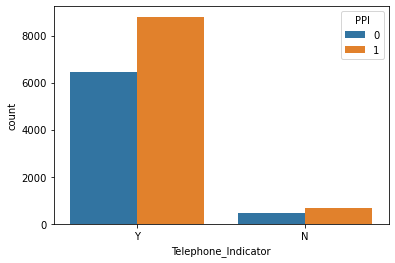

In [24]:
sns.countplot(x='Telephone_Indicator',hue='PPI',data=data)

Only 7% of people have not mentioned their telephone number. Let's add this to col_to_drop list.

In [25]:
col_to_drop = ['Telephone_Indicator']

In [26]:
data['Full_Part_Time_Empl_Ind'].value_counts(normalize=True)

F    0.995422
P    0.004578
Name: Full_Part_Time_Empl_Ind, dtype: float64

Only 0.4% of customers are part time employee. This column is highly skewed. Let's add this to col_to_drop list.

In [27]:
col_to_drop.append('Full_Part_Time_Empl_Ind')
col_to_drop

['Telephone_Indicator', 'Full_Part_Time_Empl_Ind']

In [28]:
data['Perm_Temp_Empl_Ind'].value_counts(normalize=True)

P    0.998657
T    0.001343
Name: Perm_Temp_Empl_Ind, dtype: float64

Only 0.1% of customers are temporary employee. This column is highly skewed. Let's add this to col_to_drop list.

In [29]:
col_to_drop.append('Perm_Temp_Empl_Ind')
col_to_drop

['Telephone_Indicator', 'Full_Part_Time_Empl_Ind', 'Perm_Temp_Empl_Ind']

In [30]:
data['Current_Account'].value_counts(normalize=True)

TRUE    0.998047
FALS    0.001953
Name: Current_Account, dtype: float64

Only 0.1% of customers do not have a current account. This column is highly skewed. Let's add this to col_to_drop list.

In [31]:
col_to_drop.append('Current_Account')
col_to_drop

['Telephone_Indicator',
 'Full_Part_Time_Empl_Ind',
 'Perm_Temp_Empl_Ind',
 'Current_Account']

In [32]:
data['American_Express'].value_counts(normalize=True)

FALSE    0.990478
TRUE     0.009522
Name: American_Express, dtype: float64

Only 0.9% of customers do not have American Express Card. This column is highly skewed. Let's add this to col_to_drop list.

In [33]:
col_to_drop.append('American_Express')

In [34]:
data['Diners_Card'].value_counts(normalize=True)

FALSE    0.988708
TRUE     0.011292
Name: Diners_Card, dtype: float64

Only 1.1% of customers don't have Diners Card. This column is highly skewed. Let's add this to col_to_drop list.

In [35]:
col_to_drop.append('Diners_Card')

In [36]:
data['Payment_Method'].value_counts(normalize=True)

D    0.995422
C    0.003540
S    0.001038
Name: Payment_Method, dtype: float64

99.5% customers are using Payment Method D. This column is highly skewed. Let's add this to col_to_drop list.

In [37]:
col_to_drop.append('Payment_Method')

In [38]:
data = data.drop(col_to_drop,axis=1)
data.shape

(16383, 40)

## 2.4 Analysis and Handling of Numerical Features

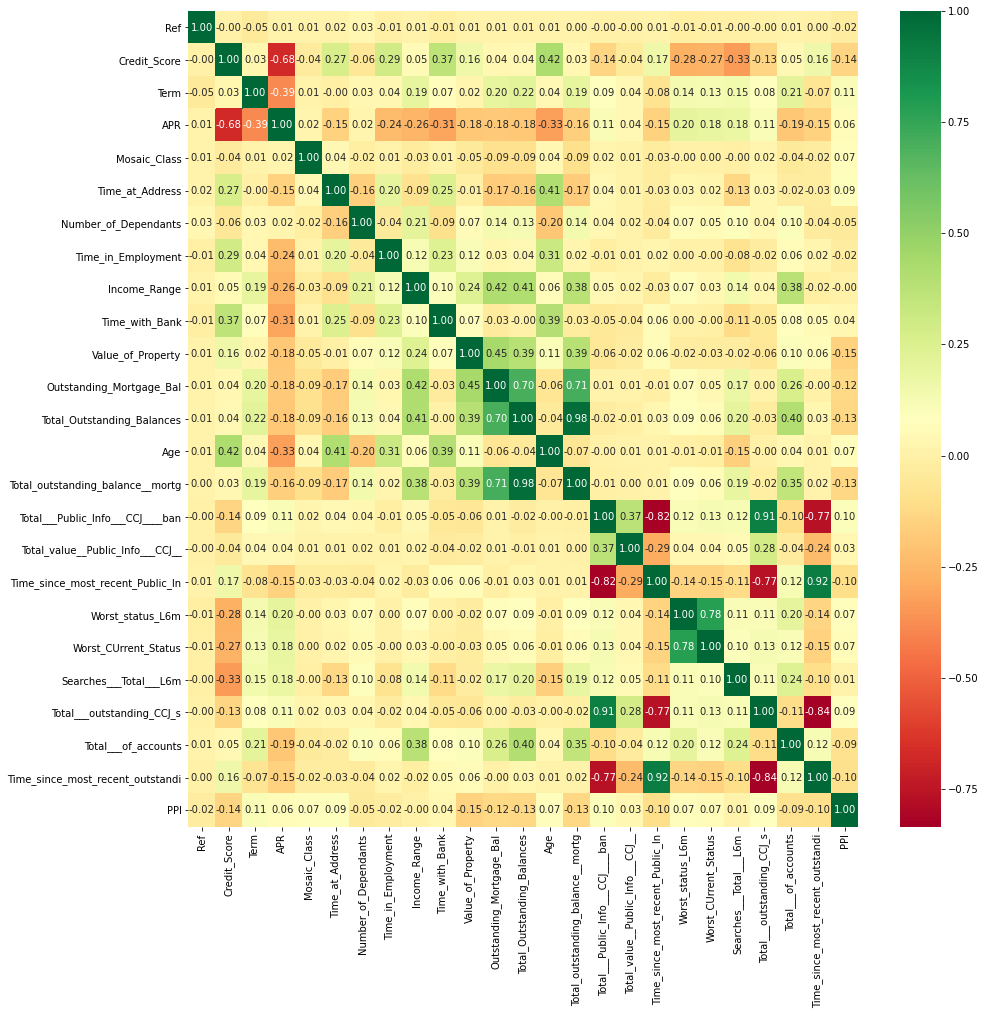

In [39]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='RdYlGn')
plt.show()

There are few variables which are highly correlated, which are not going to add much value to our analysis. So let's drop those features.

In [40]:
# Removing Highly Correlated Variables
col_to_drop = ['Total_outstanding_balance__mortg','Total___Public_Info___CCJ____ban','Time_since_most_recent_Public_In',
              'Outstanding_Mortgage_Bal','Worst_status_L6m','APR','Time_since_most_recent_outstandi']
data = data.drop(col_to_drop,axis=1)
data.shape

(16383, 33)

In [41]:
data.columns

Index(['Ref', 'Credit_Score', 'Final_Grade', 'Term', 'Loan_Type',
       'Mosaic_Class', 'Time_at_Address', 'Residential_Status',
       'Number_of_Dependants', 'Marital_Status', 'Gender',
       'Time_in_Employment', 'Employment_Status', 'Income_Range',
       'ACCESS_Card', 'VISA_Card', 'Cheque_Guarantee',
       'Other_Credit_Store_Card', 'Time_with_Bank', 'Value_of_Property',
       'Total_Outstanding_Balances', 'Age', 'Total_value__Public_Info___CCJ__',
       'Worst_CUrrent_Status', 'Searches___Total___L6m',
       'Bankruptcy_Detected__SP_', 'Total___outstanding_CCJ_s',
       'Total___of_accounts', 'CIFAS_detected', 'Insurance_Description', 'PPI',
       'prdt_desc', 'category'],
      dtype='object')

In [42]:
data.PPI.value_counts()

1    9461
0    6922
Name: PPI, dtype: int64

6922 customers have not bought any kind of PPI.

In [43]:
data.PPI.value_counts(normalize=True)

1    0.577489
0    0.422511
Name: PPI, dtype: float64

57.7% of customers have bought PPI and 42.3% of customers have not bought PPI.

In [44]:
data.Credit_Score.describe()

count    16383.000000
mean       882.061832
std         93.149605
min        352.000000
25%        818.000000
50%        882.000000
75%        947.000000
max       1295.000000
Name: Credit_Score, dtype: float64

In [45]:
# Binning of Credit Score - Very Low:300-500, Low:500-700, Average:700-900, High:900-1100, Very High:1100 & Above
bins = [300,500,700,900,1100,1300]
labels = ['Very Low','Low','Average','High','Very High']
data['Credit_Score'] = pd.cut(data['Credit_Score'],bins,labels=labels)

In [46]:
data['Credit_Score'].value_counts()

Average      9131
High         6754
Low           358
Very High     126
Very Low       14
Name: Credit_Score, dtype: int64

Most of the customers have Average and high credit score especially in the range of 700 to 1100.

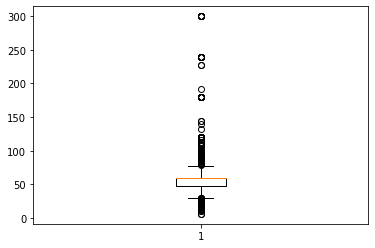

In [47]:
plt.boxplot(data['Term'])
plt.show()

In [48]:
# Binning of Term - Short Term: <2 years, Medium: 2-5 years, Long: 5+ years
bins=[0,24,60,500]
labels = ['Short', 'Medium', 'Long']
data['Term'] = pd.cut(data['Term'],bins,labels=labels)
data['Term'].value_counts()

Medium    12768
Long       2288
Short      1327
Name: Term, dtype: int64

Most of the customers fall under 'Medium Term'.

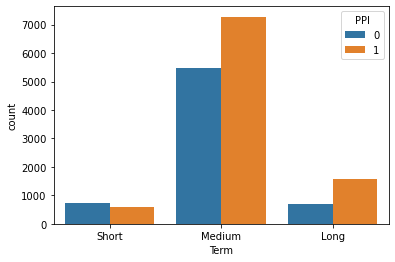

In [49]:
sns.countplot(x='Term',hue='PPI',data=data)

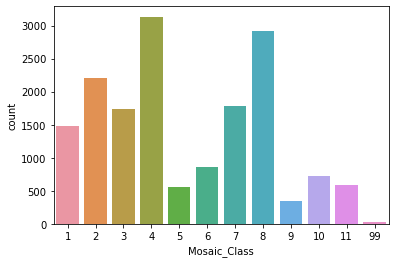

In [50]:
sns.countplot(x='Mosaic_Class',data=data)

- Customers falling under Mosaic Class of 4 and 8 are prospective buyers of PPI.
- Customers falling under Mosaic Class of 5,6,9,10,11 and 99 are least likely to buy PPI.

In [51]:
data['Time_at_Address'].describe()

count    16383.000000
mean       120.488128
std        109.192185
min          1.000000
25%         38.000000
50%         84.000000
75%        180.000000
max        864.000000
Name: Time_at_Address, dtype: float64

In [52]:
print(data[data['PPI'] == 0]['Time_at_Address'].describe())
print(data[data['PPI'] == 1]['Time_at_Address'].describe())

count    6922.000000
mean      108.741982
std       102.096791
min         1.000000
25%        33.000000
50%        76.000000
75%       156.750000
max       864.000000
Name: Time_at_Address, dtype: float64
count    9461.000000
mean      129.082021
std       113.341008
min         1.000000
25%        43.000000
50%        96.000000
75%       192.000000
max       809.000000
Name: Time_at_Address, dtype: float64


'Time_at_Address' feature contains a lot of outliers and does not add much value in seggregating the customers with PPI and customers without PPI. So let's drop this feature.

In [53]:
# Dropping 'Time_at_Address'
data = data.drop('Time_at_Address',axis=1)
data.shape

(16383, 32)

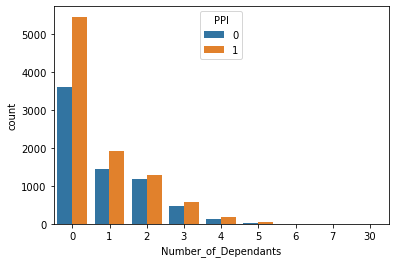

In [54]:
sns.countplot(x='Number_of_Dependants',hue='PPI',data=data)
plt.show()

If the customer has less number of dependants, then the customer is more likely to buy PPI.

In [55]:
data['Time_in_Employment'].describe()

count    16383.000000
mean       103.096075
std         91.541972
min          0.000000
25%         38.000000
50%         72.000000
75%        144.000000
max        600.000000
Name: Time_in_Employment, dtype: float64

In [56]:
print(data[data['PPI']==0]['Time_in_Employment'].describe())
print('\n')
print(data[data['PPI']==1]['Time_in_Employment'].describe())

count    6922.000000
mean      105.227391
std        93.495415
min         0.000000
25%        37.000000
50%        75.000000
75%       145.750000
max       600.000000
Name: Time_in_Employment, dtype: float64


count    9461.00000
mean      101.53673
std        90.05896
min         0.00000
25%        39.00000
50%        72.00000
75%       137.00000
max       600.00000
Name: Time_in_Employment, dtype: float64


'Time_in_Employment' feature contains outliers and does not add much value in seggregating the customers with PPI and customers without PPI. So let's drop this feature.

In [57]:
# Dropping 'Time_in_Employment'
data = data.drop('Time_in_Employment',axis=1)
data.shape

(16383, 31)

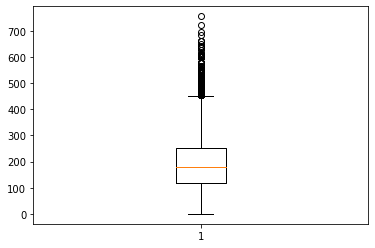

In [58]:
plt.boxplot(data['Time_with_Bank'])
plt.show()

Outliers are present. Let's try to bin this feature.

In [59]:
# Binning of Time_with_Bank
bins = [-1,100,200,300,999]
labels = ['<100','100-200','200-300','300 & Above']
data['Time_with_Bank'] = pd.cut(data['Time_with_Bank'],bins,labels=labels)
data['Time_with_Bank'].value_counts()

100-200        5728
200-300        4810
<100           3421
300 & Above    2424
Name: Time_with_Bank, dtype: int64

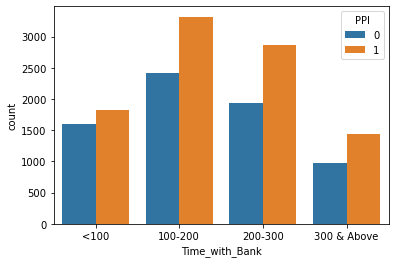

In [60]:
sns.countplot(x='Time_with_Bank',hue='PPI',data=data)

Customers who have stayed with the bank from past 100 to 300 months are more likely to buy PPI.

In [61]:
# Binning of 'Value_of_Property'
bins = [0,100000,200000,99999999999]
labels = ['Low','Medium','High']
data['Value_of_Property'] = pd.cut(data['Value_of_Property'],bins,labels=labels)
data['Value_of_Property'].value_counts()

Medium    10762
High       3316
Low        2305
Name: Value_of_Property, dtype: int64

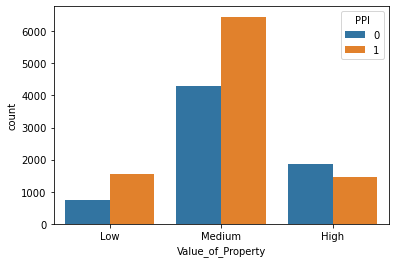

In [62]:
sns.countplot(x='Value_of_Property',hue='PPI',data=data)

When the value of the property is very high, there are less number of prospective PPI customers.

In [63]:
data['Total_Outstanding_Balances'].describe(percentiles= [0,0.1,0.25,0.5,0.75,0.99,1])

count    1.638300e+04
mean     7.821424e+04
std      8.942350e+04
min      0.000000e+00
0%       0.000000e+00
10%      2.013200e+03
25%      9.255500e+03
50%      5.943000e+04
75%      1.186560e+05
99%      3.821681e+05
100%     1.876225e+06
max      1.876225e+06
Name: Total_Outstanding_Balances, dtype: float64

In [64]:
# Binning of 'Total_Outstanding_Balances'
bins = [-1,10000,50000,100000,99999999999]
labels= ['Very Low','Low','Average','High']
data['Total_Outstanding_Balances']=pd.cut(data['Total_Outstanding_Balances'],bins,labels=labels)
data['Total_Outstanding_Balances'].value_counts()

High        5292
Very Low    4271
Low         3429
Average     3391
Name: Total_Outstanding_Balances, dtype: int64

Most of the customers fall in high 'Total_Outstanding_Balances' bracket followed by 'Very Low'.

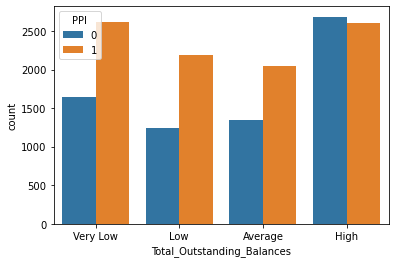

In [65]:
sns.countplot(x='Total_Outstanding_Balances',hue='PPI',data=data)
plt.show()

Across all the buckets, customers have opted for PPI. There is not any significant differences in the PPI customers across different buckets.

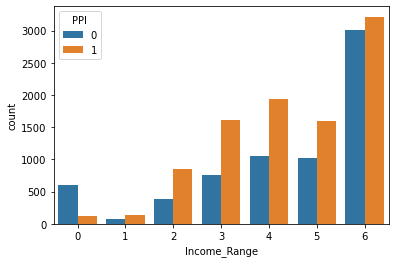

In [66]:
sns.countplot(x='Income_Range',hue='PPI',data=data)
plt.show()

High income range customers are more likely to buy PPI.

In [67]:
data['Age'].describe()

count    16383.000000
mean        44.100531
std         10.886422
min        -21.000000
25%         36.000000
50%         44.000000
75%         51.000000
max         77.000000
Name: Age, dtype: float64

Age consists of negative values, which caanot be true. Let's assume it as a typo and convert it to positive values.

In [68]:
data.loc[data['Age']<0,'Age'] = data[data['Age']<0]['Age']*(-1)

In [69]:
bins = [0,30,40,50,99]
labels = ['<30','30-40','40-50','50 & Above']
data['Age'] = pd.cut(data['Age'],bins,labels=labels)
data['Age'].value_counts()

40-50         5459
30-40         4741
50 & Above    4453
<30           1730
Name: Age, dtype: int64

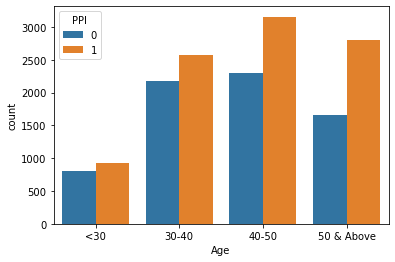

In [70]:
sns.countplot(x='Age',hue='PPI',data=data)

Customers above the age 30 are prospective PPI buyers.

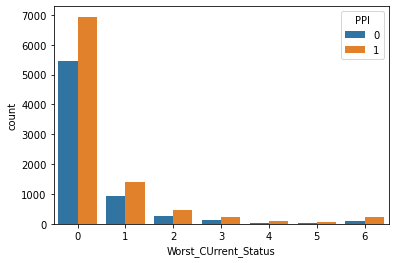

In [71]:
sns.countplot(x='Worst_CUrrent_Status',hue='PPI',data=data)
plt.show()

Worst Current status 0 & 1 are likely to buy PPI insurance.

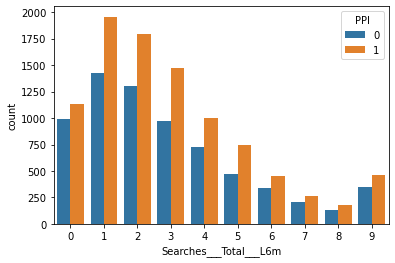

In [72]:
sns.countplot(x='Searches___Total___L6m',hue='PPI',data=data)
plt.show()

If the customer search is in 0 to 4 within last 6 months, then they are the prospects.

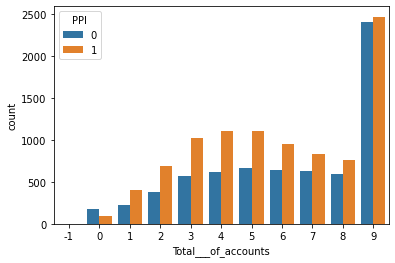

In [73]:
sns.countplot(x='Total___of_accounts',hue='PPI',data=data)
plt.show()

If a customer has 9 accounts, they are the likely PPI buyers.

## 2.5 Analysis of Other Categorical Features

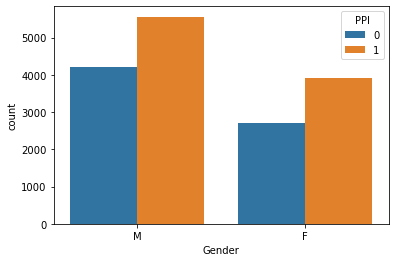

In [74]:
sns.countplot(x='Gender',hue='PPI',data=data)

Gender is not equally distributed. Male customers are more likely to buy PPI in comparison to Female customers.

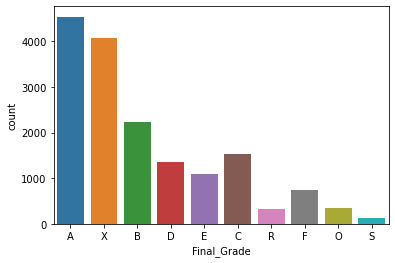

In [75]:
sns.countplot(x='Final_Grade',data=data)

Customers with 'Final_Grade' values 'A' and 'X' are more likely to buy PPI.

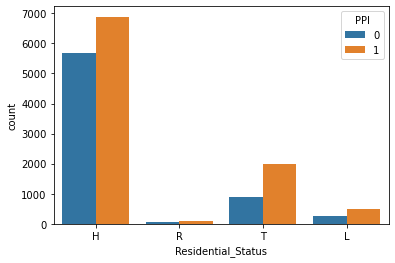

In [76]:
sns.countplot(x='Residential_Status',hue='PPI',data=data)

House owners are more likely to buy PPI followed by Tenants.

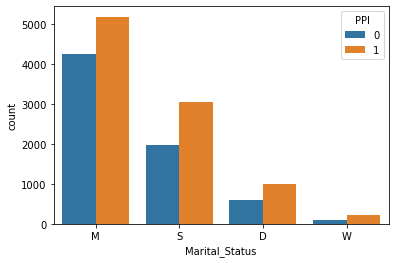

In [77]:
sns.countplot(x='Marital_Status',hue='PPI',data=data)
plt.show()

Married customers are the most prospective PPI buyers followed by Single customers.

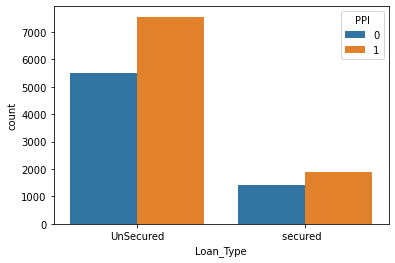

In [78]:
sns.countplot(x='Loan_Type',hue='PPI',data=data)
plt.show()

If the 'Loan_Type' is 'Unsecured', customers are more likely to buy PPI.

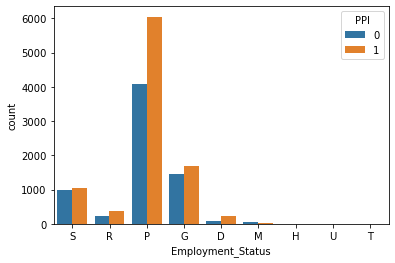

In [79]:
sns.countplot(x='Employment_Status',hue='PPI',data=data)
plt.show()

If the customer employment status is P or G, they are prospective buyers of PPI.

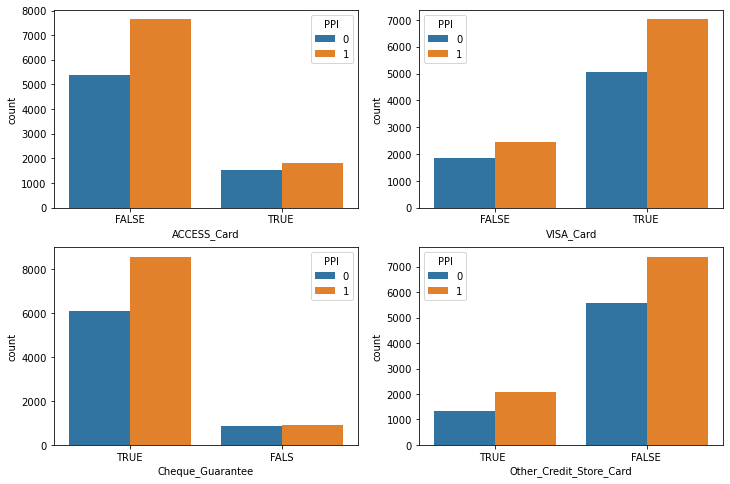

In [80]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(x='ACCESS_Card',hue='PPI',data=data)

plt.subplot(2,2,2)
sns.countplot(x='VISA_Card',hue='PPI',data=data)

plt.subplot(2,2,3)
sns.countplot(x='Cheque_Guarantee',hue='PPI',data=data)

plt.subplot(2,2,4)
sns.countplot(x='Other_Credit_Store_Card',hue='PPI',data=data)

plt.show()

Customers using/having VISA_Card and Cheque_Guarantee are more likely to buy PPI.

## 2.6 Analysis of Risk-related Features

Features having CIFAS, CCJ, Bankruptcy are related to risk. So the bank should flag the customers falling under these buckets to the risk team for further analysis before doing any proactive selling.

In [81]:
data['CIFAS_detected'].value_counts(normalize=True)

N    0.994445
Y    0.005066
T    0.000488
Name: CIFAS_detected, dtype: float64

- Bank can sell to those customers where CIFAS_detected is 'N'.
- Bank should flag those customers where CIFAS_detected is 'Y' to the risk team before any sales pitch.
- Assumption is 'T' might be typo for 'Y as 'T' and 'Y' are besides eachother in the keyboard. Let's replace 'T' with 'Y'.

In [82]:
# Let's replace 'T' with 'Y'
data['CIFAS_detected'].replace(['T'],'Y',inplace=True)
data['CIFAS_detected'].value_counts(normalize=True)

N    0.994445
Y    0.005555
Name: CIFAS_detected, dtype: float64

In [83]:
data['Bankruptcy_Detected__SP_'].value_counts(normalize=True)

N    0.998047
Y    0.001465
T    0.000488
Name: Bankruptcy_Detected__SP_, dtype: float64

- Bank can sell to those customers where Bankruptcy_Detected__SP_ is 'N'.
- Bank should flag those customers where Bankruptcy_Detected__SP_ 'Y' to the risk team before any sales pitch.
- Assumption is 'T' might be typo for 'Y as 'T' and 'Y' are besides eachother in the keyboard. Let's replace 'T' with 'Y'.

In [84]:
# Let's replace 'T' with 'Y'
data['Bankruptcy_Detected__SP_'].replace(['T'],'Y',inplace=True)
data['Bankruptcy_Detected__SP_'].value_counts(normalize=True)

N    0.998047
Y    0.001953
Name: Bankruptcy_Detected__SP_, dtype: float64

In [85]:
(data[(data['Bankruptcy_Detected__SP_']== 'Y') | (data['CIFAS_detected']=='Y') | (data['Total___outstanding_CCJ_s']!=0) | 
     (data['Total_value__Public_Info___CCJ__']!=0)].shape[0])/(data.shape[0])

0.13874137825795033

13.87% of the data needs the attention of the Risk team before any sales pitch.

In [86]:
(data[((data['Bankruptcy_Detected__SP_']== 'Y') | (data['CIFAS_detected']=='Y') | (data['Total___outstanding_CCJ_s']!=0) | 
     (data['Total_value__Public_Info___CCJ__']!=0)) & (data['PPI']==0)].shape[0])/(data[data['PPI']==0].shape[0])

0.09650390060676105

In [87]:
data_without_risk = data[(data['Bankruptcy_Detected__SP_']== 'N') & (data['CIFAS_detected']=='N') & (data['Total___outstanding_CCJ_s']==0) & 
     (data['Total_value__Public_Info___CCJ__']==0)]

In [88]:
# Remove Risk-related columns
col_to_drop = ['Bankruptcy_Detected__SP_','CIFAS_detected','Total___outstanding_CCJ_s','Total_value__Public_Info___CCJ__']
data_without_risk = data_without_risk.drop(col_to_drop,axis=1)
data_without_risk.shape

(14110, 27)

In [89]:
data_without_risk.isnull().sum()

Ref                            0
Credit_Score                   0
Final_Grade                    0
Term                           0
Loan_Type                      0
Mosaic_Class                   0
Residential_Status             0
Number_of_Dependants           0
Marital_Status                 0
Gender                         0
Employment_Status              0
Income_Range                   0
ACCESS_Card                    0
VISA_Card                      0
Cheque_Guarantee               0
Other_Credit_Store_Card        0
Time_with_Bank                 0
Value_of_Property              0
Total_Outstanding_Balances     0
Age                            0
Worst_CUrrent_Status           0
Searches___Total___L6m         0
Total___of_accounts            0
Insurance_Description          0
PPI                            0
prdt_desc                     92
category                       0
dtype: int64

# 2.7 Insurance Product Analysis with respect to Target Segments

In [90]:
pd.pivot_table(data_without_risk,values=['PPI'],index=['Age','Credit_Score'],columns='Insurance_Description',
               aggfunc='sum')

PPI                             \
Insurance_Description   1st Cust LASCI / 2nd 1st Cust LASU / 2nd Bronze   
Age        Credit_Score                                                   
<30        Very Low                      NaN                 NaN    NaN   
           Low                           1.0                 2.0    NaN   
           Average                       NaN                10.0    1.0   
           High                          NaN                 1.0    NaN   
           Very High                     NaN                 NaN    NaN   
30-40      Very Low                      NaN                 NaN    NaN   
           Low                           NaN                 1.0    1.0   
           Average                      10.0                36.0    1.0   
           High                          5.0                13.0    NaN   
           Very High                     NaN                 NaN    NaN   
40-50      Very Low                      NaN                 NaN    NaN   
           Low                           NaN                 NaN    NaN   
           Average                      15.0                38.0    NaN   
           High                          7.0                15.0    NaN   
           Very High                     NaN                 NaN    NaN   
50 & Above Low                           NaN                 NaN    1.0   
           Average                       7.0                16.0    1.0   
           High                         15.0                49.0    1.0   
           Very High                     NaN                 NaN    NaN   

                                                                        \
Insurance_Description   Foundation  Gold JOINT LASCI JOINT LASU  Joint   
Age        Credit_Score                                                  
<30        Very Low            NaN   1.0         NaN        NaN    NaN   
           Low                 NaN   3.0         NaN        2.0    3.0   
           Average             1.0  18.0         1.0       13.0   47.0   
           High                NaN   4.0         NaN        2.0    4.0   
           Very High           NaN   NaN         NaN        NaN    NaN   
30-40      Very Low            NaN   NaN         NaN        NaN    NaN   
           Low                 1.0   4.0         NaN        2.0    4.0   
           Average             1.0   8.0         2.0       20.0  116.0   
           High                NaN   2.0         2.0        7.0   56.0   
           Very High           NaN   NaN         NaN        NaN    NaN   
40-50      Very Low            NaN   NaN         NaN        NaN    NaN   
           Low                 NaN   NaN         NaN        1.0    4.0   
           Average             1.0   3.0         5.0       30.0  161.0   
           High                NaN   1.0        10.0       13.0  110.0   
           Very High           NaN   NaN         NaN        NaN    NaN   
50 & Above Low                 NaN   NaN         NaN        NaN    NaN   
           Average             NaN   4.0         2.0       12.0   74.0   
           High                NaN   1.0         9.0       24.0  123.0   
           Very High           NaN   NaN         NaN        NaN    NaN   

                                                            \
Insurance_Description   Joint Life & Critica  LASCI   LASU   
Age        Credit_Score                                      
<30        Very Low                      NaN    NaN    1.0   
           Low                           2.0    2.0   17.0   
           Average                      15.0   33.0  219.0   
           High                          NaN    4.0   24.0   
           Very High                     NaN    NaN    NaN   
30-40      Very Low                      NaN    NaN    NaN   
           Low                           NaN    1.0   14.0   
           Average                      44.0  104.0  472.0   
           High                         16.0   39.0  137.0   
           Very H

- 50 & Above Age group customers with Credit_Score between 700 to 1100 are the potential prospects of 'Life and Critical Illness'.
- 40-50 Age group customers with Credit_Score between 700 to 1100 are the potential prospects of 'LASU'.

In [91]:
pd.pivot_table(data_without_risk,values=['PPI'],index=['Marital_Status','Final_Grade'],columns='Insurance_Description',
               aggfunc='sum')

PPI                             \
Insurance_Description      1st Cust LASCI / 2nd 1st Cust LASU / 2nd Bronze   
Marital_Status Final_Grade                                                   
D              A                            NaN                 1.0    NaN   
               B                            NaN                 NaN    NaN   
               C                            NaN                 NaN    NaN   
               D                            NaN                 NaN    NaN   
               E                            NaN                 NaN    NaN   
               F                            NaN                 NaN    NaN   
               O                            NaN                 NaN    1.0   
               R                            NaN                 NaN    NaN   
               S                            NaN                 NaN    NaN   
               X                            NaN                 NaN    NaN   
M              A                           17.0                52.0    1.0   
               B                            2.0                19.0    NaN   
               C                            3.0                18.0    NaN   
               D                            6.0                 5.0    NaN   
               E                            2.0                 6.0    NaN   
               F                            1.0                 5.0    NaN   
               O                            1.0                 1.0    1.0   
               R                            NaN                 3.0    2.0   
               S                            NaN                 NaN    NaN   
               X                           17.0                38.0    NaN   
S              A                            5.0                 9.0    NaN   
               B                            1.0                 5.0    NaN   
               C                            NaN                 8.0    1.0   
               D                            NaN                 4.0    NaN   
               E                            2.0                 3.0    NaN   
               F                            1.0                 2.0    NaN   
               O                            NaN                 NaN    NaN   
               R                            1.0                 1.0    NaN   
               S                            NaN                 NaN    NaN   
               X                            1.0                 1.0    NaN   
W              A                            NaN                 NaN    NaN   
               B                            NaN                 NaN    NaN   
               C                            NaN                 NaN    NaN   
               D                            NaN                 NaN    NaN   
               E                            NaN                 NaN    NaN   
               F                            NaN                 NaN    NaN   
               O                            NaN                 NaN    NaN   
               R                            NaN                 NaN    NaN   
               X                            NaN                 NaN    NaN   

                                                                          \
Insurance_Description      Foundation Gold JOINT LASCI JOINT LASU  Joint   
Marital_Status Final_Grade                                                 
D              A                  NaN  1.0         1.0        NaN    5.0   
               B                  NaN  NaN         NaN        NaN    2.0   
               C                  NaN  NaN         NaN        1.0    1.0   
               D                  NaN  NaN         NaN        1.0    1.0   
               E                  NaN  NaN         NaN        NaN    NaN   
               F                  NaN  1.0         NaN        NaN    1.0   
               O                  NaN  1.0         NaN        NaN    NaN   
       

- 'Joint LASCI' products can only be targeted towards 'Married' customers with Final_Grade A
- Widow and Divorcee with Final_Grade A and X can be targeted with 'Life & Critical Illness' or 'LASU' product.

In [92]:
pd.pivot_table(data_without_risk,values=['PPI'],index=['Income_Range','Credit_Score'],columns='Insurance_Description',
               aggfunc='sum')

PPI                             \
Insurance_Description     1st Cust LASCI / 2nd 1st Cust LASU / 2nd Bronze   
Income_Range Credit_Score                                                   
0            Very Low                      NaN                 NaN    NaN   
             Low                           NaN                 NaN    2.0   
             Average                       NaN                 NaN    3.0   
             High                          NaN                 NaN    NaN   
             Very High                     NaN                 NaN    NaN   
1            Very Low                      NaN                 NaN    NaN   
             Low                           NaN                 NaN    NaN   
             Average                       NaN                 NaN    NaN   
             High                          NaN                 NaN    NaN   
2            Low                           NaN                 1.0    NaN   
             Average                       NaN                 2.0    NaN   
             High                          NaN                 2.0    1.0   
3            Very Low                      NaN                 NaN    NaN   
             Low                           NaN                 1.0    NaN   
             Average                       3.0                13.0    NaN   
             High                          2.0                 9.0    NaN   
4            Very Low                      NaN                 NaN    NaN   
             Low                           1.0                 1.0    NaN   
             Average                       5.0                30.0    NaN   
             High                          8.0                20.0    NaN   
             Very High                     NaN                 NaN    NaN   
5            Low                           NaN                 NaN    NaN   
             Average                       2.0                28.0    NaN   
             High                          7.0                22.0    NaN   
6            Low                           NaN                 NaN    NaN   
             Average                      22.0                27.0    NaN   
             High                         10.0                25.0    NaN   
             Very High                     NaN                 NaN    NaN   

                                                                          \
Insurance_Description     Foundation  Gold JOINT LASCI JOINT LASU  Joint   
Income_Range Credit_Score                                                  
0            Very Low            NaN   1.0         NaN        NaN    NaN   
             Low                 1.0   7.0         NaN        NaN    NaN   
             Average             3.0  32.0         NaN        NaN    NaN   
             High                NaN   8.0         NaN        NaN    NaN   
             Very High           NaN   NaN         NaN        NaN    NaN   
1            Very Low            NaN   NaN         NaN        NaN    NaN   
             Low                 NaN   NaN         NaN        NaN    NaN   
             Average             NaN   NaN         NaN        NaN    1.0   
             High                NaN   NaN         NaN        NaN    2.0   
2            Low                 NaN   NaN         NaN        NaN    NaN   
             Average             NaN   NaN         NaN        NaN    2.0   
             High                NaN   NaN         1.0        2.0    1.0   
3            Very Low            NaN   NaN         NaN        NaN    NaN   
             Low                 NaN   NaN         NaN        NaN    NaN   
             Average             NaN   NaN         NaN        4.0   16.0   
             High                NaN   NaN         1.0        NaN   17.0   
4            Very Low            NaN   NaN         NaN        NaN    NaN   
             Low                 NaN   NaN         NaN        NaN    4.0   
             Average             NaN   NaN         1.0     

In [93]:
pd.pivot_table(data_without_risk,values=['PPI'],index=['Time_with_Bank','Searches___Total___L6m'],columns='Insurance_Description',
               aggfunc='sum')

PPI  \
Insurance_Description                 1st Cust LASCI / 2nd   
Time_with_Bank Searches___Total___L6m                        
<100           0                                       3.0   
               1                                       2.0   
               2                                       1.0   
               3                                       1.0   
               4                                       1.0   
               5                                       NaN   
               6                                       NaN   
               7                                       1.0   
               8                                       NaN   
               9                                       NaN   
100-200        0                                       1.0   
               1                                       2.0   
               2                                       3.0   
               3                                       2.0   
               4                                       2.0   
               5                                       4.0   
               6                                       1.0   
               7                                       NaN   
               8                                       1.0   
               9                                       4.0   
200-300        0                                       NaN   
               1                                       4.0   
               2                                       4.0   
               3                                       1.0   
               4                                       2.0   
               5                                       3.0   
               6                                       1.0   
               7                                       NaN   
               8                                       NaN   
               9                                       2.0   
300 & Above    0                                       3.0   
               1                                       NaN   
               2                                       4.0   
               3                                       3.0   
               4                                       1.0   
               5                                       1.0   
               6                                       1.0   
               7                                       NaN   
               8                                       NaN   
               9                                       1.0   

                                                                             \
Insurance_Description                 1st Cust LASU / 2nd Bronze Foundation   
Time_with_Bank Searches___Total___L6m                                         
<100           0                                      1.0    1.0        NaN   
               1                                      7.0    NaN        NaN   
               2                                      4.0    NaN        NaN   
               3                                     13.0    1.0        NaN   
               4                                      3.0    NaN        NaN   
               5                                      5.0    1.0        1.0   
               6                                      1.0    NaN        NaN   
               7                                      3.0    NaN        NaN   
               8                                      2.0    NaN        NaN   
               9                                      3.0    1.0        NaN   
100-200        0                                      2.0    1.0        NaN   
               1                                      9.0    NaN        NaN   
               2                                     16.0    NaN        NaN   
               3                                      8.0    NaN        NaN   
               4                             

In [94]:
pd.pivot_table(data_without_risk,values=['PPI'],index=['Value_of_Property','Total_Outstanding_Balances'],columns='Insurance_Description',
               aggfunc='sum')

PPI  \
Insurance_Description                        1st Cust LASCI / 2nd   
Value_of_Property Total_Outstanding_Balances                        
Low               Very Low                                    NaN   
                  Low                                         3.0   
                  Average                                     1.0   
                  High                                        NaN   
Medium            Very Low                                    4.0   
                  Low                                        10.0   
                  Average                                     9.0   
                  High                                       15.0   
High              Very Low                                    NaN   
                  Low                                         5.0   
                  Average                                     1.0   
                  High                                       12.0   

                                                                         \
Insurance_Description                        1st Cust LASU / 2nd Bronze   
Value_of_Property Total_Outstanding_Balances                              
Low               Very Low                                   3.0    NaN   
                  Low                                        9.0    NaN   
                  Average                                   28.0    NaN   
                  High                                       7.0    NaN   
Medium            Very Low                                  28.0    6.0   
                  Low                                       28.0    NaN   
                  Average                                   20.0    NaN   
                  High                                      35.0    NaN   
High              Very Low                                   3.0    NaN   
                  Low                                        3.0    NaN   
                  Average                                    2.0    NaN   
                  High                                      15.0    NaN   

                                                                           \
Insurance_Description                        Foundation  Gold JOINT LASCI   
Value_of_Property Total_Outstanding_Balances                                
Low               Very Low                          NaN   NaN         NaN   
                  Low                               NaN   NaN         2.0   
                  Average                           NaN   NaN         3.0   
                  High                              NaN   1.0         NaN   
Medium            Very Low                          3.0  40.0         4.0   
                  Low                               1.0   4.0         6.0   
                  Average                           NaN   1.0         3.0   
                  High                              NaN   3.0         7.0   
High              Very Low                          NaN   NaN         NaN   
                  Low                               NaN   NaN         1.0   
                  Average                           NaN   NaN         NaN   
                  High                              NaN   NaN         5.0   

                                                                \
Insurance_Description                        JOINT LASU  Joint   
Value_of_Property Total_Outstanding_Balances                     
Low               Very Low                          3.0   11.0   
                  Low                               5.0   28.0   
                  Average                          11.0   62.0   
                  High                              3.0   19.0   
Medium            Very Low                         14.0   86.0   
                  Low                              30.0  127.0   
                  Average                          12.0   84.0   
                  High                             31.0  160.0   
High              

In [95]:
pd.pivot_table(data_without_risk,values=['PPI'],index=['Employment_Status','Residential_Status'],columns='Insurance_Description',
               aggfunc='sum')

PPI                      \
Insurance_Description                1st Cust LASCI / 2nd 1st Cust LASU / 2nd   
Employment_Status Residential_Status                                            
D                 H                                   NaN                 NaN   
                  L                                   NaN                 NaN   
                  R                                   NaN                 NaN   
                  T                                   NaN                 NaN   
G                 H                                   4.0                24.0   
                  L                                   NaN                 NaN   
                  R                                   NaN                 NaN   
                  T                                   1.0                 2.0   
H                 H                                   NaN                 NaN   
                  L                                   NaN                 NaN   
                  T                                   NaN                 NaN   
M                 H                                   NaN                 NaN   
                  L                                   NaN                 NaN   
                  R                                   NaN                 NaN   
                  T                                   NaN                 NaN   
P                 H                                  16.0               125.0   
                  L                                   NaN                 1.0   
                  R                                   NaN                 1.0   
                  T                                   NaN                28.0   
R                 H                                   NaN                 NaN   
                  L                                   NaN                 NaN   
                  R                                   NaN                 NaN   
                  T                                   NaN                 NaN   
S                 H                                  37.0                 NaN   
                  L                                   NaN                 NaN   
                  R                                   NaN                 NaN   
                  T                                   2.0                 NaN   
T                 H                                   NaN                 NaN   
U                 H                                   NaN                 NaN   
                  L                                   NaN                 NaN   
                  T                                   NaN                 NaN   

                                                                          \
Insurance_Description                Bronze Foundation  Gold JOINT LASCI   
Employment_Status Residential_Status                                       
D                 H                     NaN        NaN   NaN         NaN   
                  L                     NaN        NaN   NaN         NaN   
                  R                     NaN        NaN   NaN         NaN   
                  T                     3.0        1.0   NaN         NaN   
G                 H                     NaN        NaN   NaN         7.0   
                  L                     NaN        NaN   NaN         NaN   
                  R                     NaN        NaN   NaN         NaN   
                  T                     NaN        NaN   2.0         1.0   
H                 H                     NaN        NaN   NaN         NaN   
                  L                     NaN        NaN   NaN         NaN   
                  T                     NaN        NaN   NaN         NaN   
M                 H                     NaN        NaN   NaN         NaN   
                  L                     NaN        NaN   NaN         NaN   
                  R                     NaN        NaN   NaN         NaN   
       

In [96]:
pd.pivot_table(data_without_risk,values=['PPI'],index=['Number_of_Dependants'],columns='Insurance_Description',
               aggfunc='sum')

PPI                             \
Insurance_Description 1st Cust LASCI / 2nd 1st Cust LASU / 2nd Bronze   
Number_of_Dependants                                                    
0                                     27.0                77.0    6.0   
1                                     11.0                42.0    NaN   
2                                     17.0                33.0    NaN   
3                                      3.0                14.0    NaN   
4                                      2.0                14.0    NaN   
5                                      NaN                 1.0    NaN   
6                                      NaN                 NaN    NaN   
7                                      NaN                 NaN    NaN   
30                                     NaN                 NaN    NaN   

                                                                      \
Insurance_Description Foundation  Gold JOINT LASCI JOINT LASU  Joint   
Number_of_Dependants                                                   
0                            4.0  43.0        19.0       59.0  332.0   
1                            NaN   1.0         7.0       36.0  166.0   
2                            NaN   2.0         3.0       12.0  135.0   
3                            NaN   3.0         2.0       13.0   49.0   
4                            NaN   NaN         NaN        5.0   17.0   
5                            NaN   NaN         NaN        1.0    2.0   
6                            NaN   NaN         NaN        NaN    1.0   
7                            NaN   NaN         NaN        NaN    NaN   
30                           NaN   NaN         NaN        NaN    NaN   

                                                           \
Insurance_Description Joint Life & Critica  LASCI    LASU   
Number_of_Dependants                                        
0                                    141.0  370.0  1170.0   
1                                     72.0  109.0   374.0   
2                                     42.0   82.0   271.0   
3                                     22.0   36.0   111.0   
4                                      6.0   11.0    21.0   
5                                      2.0    3.0    15.0   
6                                      NaN    NaN     4.0   
7                                      1.0    NaN     NaN   
30                                     NaN    NaN     1.0   

                                                                              \
Insurance_Description Life & Critical Illn No PPI  Other  Plus Select Silver   
Number_of_Dependants                                                           
0                                   1112.0    0.0  234.0  17.0    5.0    5.0   
1                                    343.0    0.0   91.0   NaN    1.0    NaN   
2                                    207.0    0.0   55.0   NaN    NaN    NaN   
3                                    109.0    0.0   23.0   1.0    NaN    1.0   
4                                     26.0    0.0    5.0   NaN    NaN    1.0   
5                                      6.0    0.0    2.0   NaN    NaN    NaN   
6                                      NaN    0.0    NaN   NaN    NaN    NaN   
7                                      1.0    NaN    NaN   NaN    NaN    NaN   
30                                     NaN    NaN    NaN   NaN    NaN    NaN   

                               
Insurance_Description  Single  
Number_of_Dependants           
0                      1001.0  
1                       305.0  
2                       183.0  
3                        69.0  
4                        23.0  
5                         6.0  
6                         1.0  
7                         NaN  
30                        NaN

In [97]:
pd.pivot_table(data_without_risk,values=['PPI'],index=['Worst_CUrrent_Status','Mosaic_Class'],columns='Insurance_Description',
               aggfunc='sum').head(24)

PPI                      \
Insurance_Description             1st Cust LASCI / 2nd 1st Cust LASU / 2nd   
Worst_CUrrent_Status Mosaic_Class                                            
0                    1                             NaN                 4.0   
                     2                            11.0                 5.0   
                     3                             4.0                18.0   
                     4                             9.0                26.0   
                     5                             1.0                 4.0   
                     6                             NaN                 4.0   
                     7                             4.0                28.0   
                     8                             7.0                25.0   
                     9                             NaN                 NaN   
                     10                            1.0                 1.0   
                     11                            2.0                 2.0   
                     99                            NaN                 NaN   
1                    1                             NaN                 1.0   
                     2                             NaN                 4.0   
                     3                             2.0                 2.0   
                     4                             2.0                 7.0   
                     5                             NaN                 1.0   
                     6                             NaN                 7.0   
                     7                             NaN                 5.0   
                     8                             3.0                 4.0   
                     9                             NaN                 2.0   
                     10                            1.0                 1.0   
                     11                            NaN                 2.0   
                     99                            NaN                 NaN   

                                                                       \
Insurance_Description             Bronze Foundation  Gold JOINT LASCI   
Worst_CUrrent_Status Mosaic_Class                                       
0                    1               1.0        NaN  18.0         2.0   
                     2               NaN        NaN   1.0         6.0   
                     3               NaN        NaN   5.0         NaN   
                     4               1.0        NaN   2.0         2.0   
                     5               NaN        NaN   1.0         2.0   
                     6               NaN        NaN   3.0         2.0   
                     7               2.0        4.0   4.0         5.0   
                     8               NaN        NaN   5.0         2.0   
                     9               NaN        NaN   1.0         1.0   
                     10              1.0        NaN   NaN         2.0   
                     11              NaN        NaN   NaN         1.0   
                     99              NaN        NaN   NaN         NaN   
1                    1               NaN        NaN   2.0         1.0   
                     2               NaN        NaN   NaN         NaN   
                     3               NaN        NaN   NaN         NaN   
                     4               NaN        NaN   NaN         NaN   
                     5               NaN        NaN   NaN         NaN   
                     6               NaN        NaN   NaN         NaN   
                     7               1.0        NaN   NaN         NaN   
                     8               NaN        NaN   1.0         1.0   
                     9               NaN        NaN   NaN         NaN   
                     10              NaN        NaN   NaN         1.0   
                     11              NaN        NaN   NaN         NaN   
                     99              NaN      

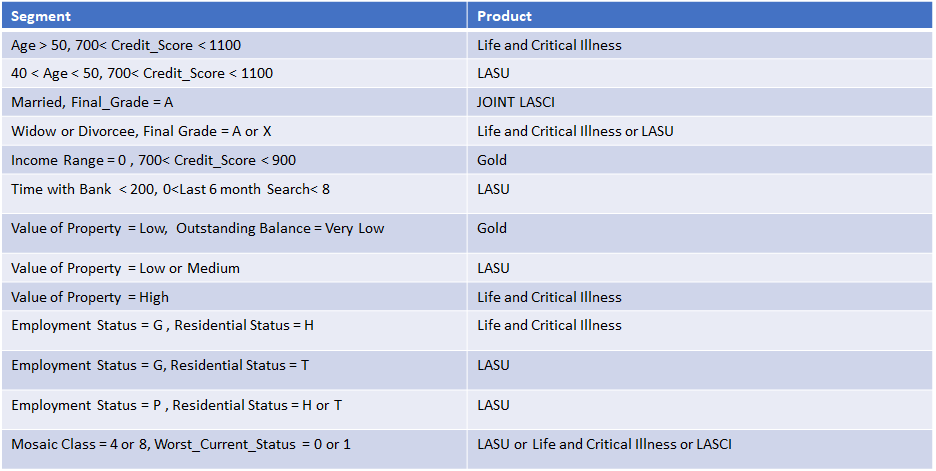